**(2021-22 BNM832) Big Data for Decision Making Group  Assignment**

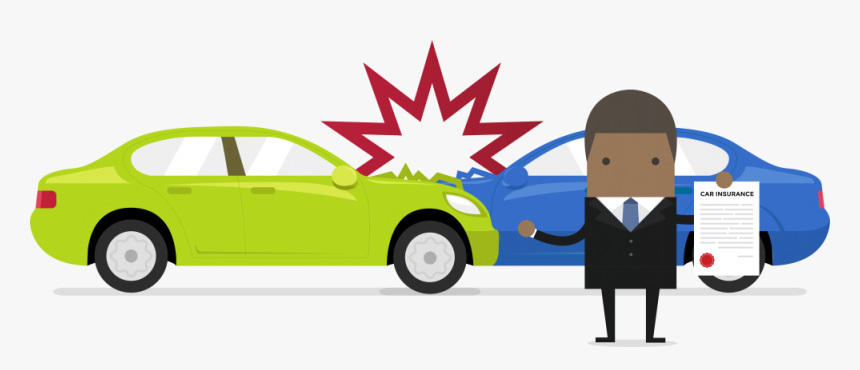

# Accident severity prediction using classification

Accident severity has been predicted using traditional methods of statistics in the past, such as logit algos, multinomial logit and logistic regression. However, these measures have been unable to predict non-linear relationships between independent factors that affect the causality of a road accident, thereby predicting inaccurate severity measures. The primary objective of this project is Data Preprocessing and an Exploratory Data Analysis of all independent variables that have been found to be highly related to the severity of an accident in the UK.

#### **Contents**

1.   Importing Libraries and Preparing Environment
2.   Business Objective
3.   Data Preparation
4.   Data Preprocessing
5.   Splitting Data into Training and Testing
6.   Desriptive Statisitics on Training Dataset
7.   Data Cleaning
8.   Conclusion
9.   Data Exporting 

### **1. Importing Essential Libraries and Preparing Environment**

In [ ]:
# Base Libraries
import re
import time 
import numpy as np
import pandas as pd
import statistics
import warnings
warnings.filterwarnings(action='ignore')

# Library for Plotting
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
Start_time = time.time()

In [ ]:
# Decorator used to monitor how long each step of the ML Pipeline takes to run 
def time_step(fn):
  def wrapper(*args, **kwargs):
    start_time = time.time()
    result = fn(*args, **kwargs)
    end_time = time.time()
    time_taken = round(end_time - start_time, 4)
    if time_taken < 60:
      print(f'{fn.__name__} took {time_taken} seconds to run')
    else :
      print(f'{fn.__name__} took {time_taken/60} minutes to run')
    return result
  return wrapper

### **2. Business Objective**

Most car accident in the UK occur on high speed motorways in the countryside that are far from any hospital or emergency services reach. As a consequence, many chronic injuries are sustained, along with loss of life. Most injuries incured in car accidents can be prevented if proper care relief is provided at the right time.
In times of multiple car accident crashes in the vicinity of the nearest emergency service, the aid has only a limited number of resources, which cannot practically be disperesed to each accident site. A situation like this requires priority based response.

The objective of this project is to predict accident severity accurately based on predictor variables that can be obtained from the site of crash. The severity rating can then be used to prioritise dispatch of response team and organize first aid resources accordingly.
Furthermore, this report discusses the mapping of accident hotspots to encourage resource allocation in specific areas.

### **2.0 - Data Preparation**
**2.1 - Loading Data - UK Road Safety Data**

There are several datasets available on the UK Road Safety website so the group has decided to choose three datasets to maximise the effectiveness of the predictive model for the individual assignment.

The datasets are:

*   dft-road-casualty-statistics-accident-2020.csv
*   dft-road-casualty-statistics-casualty-2020.csv
*   dft-road-casualty-statistics-vehicle-2020.csv



In [ ]:
# Loading the datasets into dataframes
accident_df = pd.read_csv("dft-road-casualty-statistics-accident-2020.csv")
casualty_df = pd.read_csv("dft-road-casualty-statistics-casualty-2020.csv")
vehicle_df = pd.read_csv("dft-road-casualty-statistics-vehicle-2020.csv")

In [ ]:
# Validating Accident Dataframe
accident_df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


In [ ]:
# Validating shape of Accident Dataframe
accident_df.shape

(91199, 36)

In [ ]:
# Validating Casualty Dataframe
casualty_df.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3


In [ ]:
# Validating shape of Casualty Dataframe
casualty_df.shape

(115584, 18)

In [ ]:
# Validating Vehicle Dataframe
vehicle_df.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2020010219808,2020,10219808,1,9,9,5,1,5,0,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,2020010220496,2020,10220496,1,9,0,4,2,6,0,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,2020010228005,2020,10228005,1,9,0,18,-1,-1,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2020010228006,2020,10228006,1,8,0,18,1,5,0,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,2020010228011,2020,10228011,1,9,0,18,3,7,9,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1


In [ ]:
# Validating shape of Vehicle Dataframe
vehicle_df.shape

(167375, 27)

### **3.0 Creating the New Feature Dataframe**

Upon a inspection, we can see that the Casualty and Vehicle Dataframe has the following features in common:

*   accident_index
*   accident_year
*   accidnet_reference
*   vehicle_reference

These will be used to merge them into a new dataframe


In [ ]:
merged_df = pd.merge(vehicle_df,casualty_df, on=["accident_reference","accident_index","accident_year","vehicle_reference"], how="right")

A similar case is found for the newly created dataframe and the accident dataframe using that the main dataframe is created.

In [ ]:
df = pd.merge(merged_df,accident_df, on=["accident_reference","accident_index","accident_year"], how="right")

In [ ]:
# Dropping rows with NaN values
df.dropna(inplace=True)

In [ ]:
# Validating the newly created dataframe
df.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
17871,2020010278554,2020,010278554,2.0,3.0,0.0,6.0,7.0,7.0,0.0,...,0,4,1,2,0,0,1,1,2,E01000994
17872,2020010278556,2020,010278556,1.0,3.0,0.0,99.0,9.0,9.0,99.0,...,9,1,1,9,0,0,1,3,2,E01000927
17873,2020010278558,2020,010278558,1.0,3.0,0.0,15.0,3.0,7.0,0.0,...,5,4,1,2,0,0,1,1,2,E01004022
17874,2020010278559,2020,010278559,1.0,3.0,0.0,18.0,4.0,8.0,0.0,...,5,4,1,2,0,0,1,1,2,E01003151
17875,2020010278561,2020,010278561,1.0,11.0,0.0,7.0,5.0,7.0,0.0,...,5,4,8,2,0,0,1,1,2,E01001762


In [ ]:
# Validating the shape of newly created dataframe
df.shape

(92433, 74)

**3.1 Preliminary Data Analysis**

Due to the large number of features available a preliminary data analysis is necessary to choose only the variables that are most useful for the predictive model. Varible selection also needs to be made based on information that is readily avaible at the time of crash for the purpose of out business objective.

In [ ]:
# Correlation scores for accident_severity
corr = df.corr().round(2)
print(corr['accident_severity'].sort_values().to_string())

urban_or_rural_area                           -0.12
number_of_casualties                          -0.12
speed_limit                                   -0.12
age_of_casualty                               -0.07
age_band_of_casualty                          -0.06
vehicle_leaving_carriageway                   -0.06
light_conditions                              -0.06
local_authority_district                      -0.05
police_force                                  -0.05
pedestrian_location                           -0.05
casualty_class                                -0.05
age_band_of_driver                            -0.05
age_of_driver                                 -0.05
latitude                                      -0.04
driver_home_area_type                         -0.04
location_northing_osgr                        -0.04
road_type                                     -0.04
age_of_vehicle                                -0.03
skidding_and_overturning                      -0.03
pedestrian_m

**3.2 New Dataframe after Preliminary Analysis:**

In [ ]:
# Droping duplicates from dataframe df
df.drop_duplicates(inplace=True)
# Resetting indices
df.reset_index(inplace=True)
# Creation of new dataframe
df_filtered = df[["first_point_of_impact", "trunk_road_flag", "urban_or_rural_area", "number_of_casualties",
                         "speed_limit", "age_band_of_casualty", "vehicle_leaving_carriageway", "light_conditions",
                         "local_authority_district", "casualty_class", "age_band_of_driver", "latitude","longitude",
                         "road_type", "driver_home_area_type", "age_of_vehicle", "skidding_and_overturning",
                         "driver_imd_decile", "vehicle_type", "engine_capacity_cc", "weather_conditions",
                         "number_of_vehicles", "vehicle_location_restricted_lane",
                      "junction_location", "second_road_class", "junction_control", "sex_of_casualty",
                         "sex_of_driver","did_police_officer_attend_scene_of_accident","casualty_severity","accident_severity"]]

In [ ]:
# Validating latest dataframe
df_filtered.head()

,first_point_of_impact,trunk_road_flag,urban_or_rural_area,number_of_casualties,speed_limit,age_band_of_casualty,vehicle_leaving_carriageway,light_conditions,local_authority_district,casualty_class,...,number_of_vehicles,vehicle_location_restricted_lane,junction_location,second_road_class,junction_control,sex_of_casualty,sex_of_driver,did_police_officer_attend_scene_of_accident,casualty_severity,accident_severity
0,3.0,2,1,1,20,5.0,0.0,4,20,1.0,...,2,0.0,0.0,0,-1,1.0,1.0,1,2.0,2
1,9.0,2,1,1,30,4.0,9.0,1,2,1.0,...,2,99.0,9.0,6,4,1.0,1.0,3,2.0,2
2,2.0,2,1,1,20,7.0,0.0,4,8,1.0,...,2,0.0,2.0,5,2,1.0,1.0,1,3.0,3
3,4.0,2,1,1,30,7.0,0.0,4,9,1.0,...,2,0.0,0.0,0,-1,1.0,1.0,1,3.0,3
4,4.0,2,1,1,20,7.0,0.0,4,4,3.0,...,1,0.0,2.0,6,2,1.0,1.0,1,2.0,2


In [ ]:
# Validating shape of dataframe
df_filtered.shape

(92433, 31)

**3.3 Variable Notes**

The variables are narrowed down into 2 main types:
*   Categorical : Variables containing value indicating a category.
*   Numeric : Variables containing numeric values.

| Input Data | Definition | Category |
| --- | --- | --- |
| first_point_of_impact | Location of first impact | Categorical |
| trunk_road_flag | Whether road is under central government | Categorical |
| urban_or_rural_area | Whether driver is from rural or urban area | Categorical |
| number_of_casualties | Total number of casualties | Numeric |
| speed_limit | Speed limit of road | Numeric |
| age_band_of_casualty | Age group of casualty | Categorical |
| vehicle_leaving_carriageway | Displacement of vehicle from  carriageway | Categorical |
| light_conditions | Lighting conditions of road | Categorical |
| local_authority_district | District in which the accident happened | Categorical |
| casualty_class | Casualty group | Categorical |
| age_band_of_driver | Age group of driver | Categorical |
| latitude | Latitude values | Numeric |
| longitude | Logitude values | Numeric |
| road_type | Type of road | Categorical |
| driver_home_area_type | Residential Type of driver | Categorical |
| age_of_vehicle | How old is the vehicle | Numeric |
| skidding_and_overturning | Degree of skidding and overturning involved | Categorical |
| driver_imd_decile | Deprivation score of the area | Categorical |
| vehicle_type | Type of Vehicle | Numeric |
| engine_capacity_cc | Engine Capacity of Vehivle in cc | Numeric |
| weather_conditions | Weather Conditions | Categorical |
| number_of_vehicles | Number of Vehicles involved | Numeric |
| vehicle_location_restricted_lane | Whether the vehicle was in a restricted area | Categorical|
| junction_location | Location of nearest junction | Categorical |
| second_road_class | Location of nearest second road class | Categorical |
| junction_control | Location of nearest junction control | Categorical |
| sex_of_casualty | Gender of casualty | Categorical |
| did_police_officer_attend_scene_of_accident | Presence of Police in the accident scene | Categorical |
| casualty_severity | How severe is the casualty | Categorical |
| accident_severity | How severe is the accident | Categorical |

### **4.0 Further Data Preprocessing**

Upon data preprocessing, it is observed that there are multiple missing or unknown values that needs to be treated in order to maintain data integrity. For this, unknown and missing values are converted to Nan, which can then be imputed later.

In [ ]:
# Function which replaces missing or unknown values with NaN
def initialising_nan(dataframe, column_name, value_data):
    for value in value_data:
        dataframe.loc[dataframe[column_name] == value, column_name] = np.nan

Each of the features are analysed and the depending on the results the function is used on them accordingly.

In [ ]:
# "First point of impact"
# =======================
# identifying the missing and unknown values
print(df_filtered["first_point_of_impact"].value_counts())
# modifying missing and unknown values in first point of impact feature
# modifying the missing and unknown values by null values for succeeding imputation
initialising_nan(df_filtered, "first_point_of_impact", [-1, 9]) 

 1.0    47541
 2.0    15477
 3.0    12653
 4.0    12011
 0.0     3668
 9.0      562
-1.0      521
Name: first_point_of_impact, dtype: int64


In [ ]:
# "Trunk road flag"
# =================
# identifying the missing and unknown values
print(df_filtered["trunk_road_flag"].value_counts())
# modifying the missing and unknown values by null values for succeeding imputation
initialising_nan(df_filtered, "trunk_road_flag", [-1])


 2    78682
 1     7715
-1     6036
Name: trunk_road_flag, dtype: int64


In [ ]:
# "Urban or rural area"
# =====================
# Identifying the missing and unknown values
print(df_filtered["urban_or_rural_area"].value_counts())
# since there are no missing and unknown values there is no data cleaning required

1    53546
2    38887
Name: urban_or_rural_area, dtype: int64


In [ ]:
# "Speed limit"
# =============
# identifying the missing and unknown values
print(df_filtered["speed_limit"].value_counts())
# modifying the missing and unknown values by null values for succeeding imputation
initialising_nan(df_filtered, "speed_limit", [-1])

 30    51057
 60    15420
 40     9403
 70     6632
 20     5150
 50     4762
-1         9
Name: speed_limit, dtype: int64


In [ ]:
# "Age band of casualty"
# ======================
# identifying the missing and unknown values
print(df_filtered["age_band_of_casualty"].value_counts())
# modifying the missing and unknown values by null values for succeeding imputation
initialising_nan(df_filtered, "age_band_of_casualty", [-1])

 6.0     19080
 7.0     13689
 8.0     12700
 5.0     10656
 4.0      9872
 9.0      8745
 10.0     4726
 3.0      4131
 11.0     3594
 2.0      2214
 1.0      1538
-1.0      1488
Name: age_band_of_casualty, dtype: int64


In [ ]:
# "Vehicle leaving carriageway"
# ============================
# identifying the missing and unknown values
print(df_filtered["vehicle_leaving_carriageway"].value_counts())
# modifying the missing and unknown values by null values for succeeding imputation
initialising_nan(df_filtered, "vehicle_leaving_carriageway", [-1])

 0.0    73758
 1.0     8886
 7.0     4513
 2.0     1271
 9.0     1226
 3.0      746
 8.0      685
 4.0      476
-1.0      381
 5.0      360
 6.0      131
Name: vehicle_leaving_carriageway, dtype: int64


Similarly, all the categorical data feautres will be changed in this manner.

In [ ]:
# "Light conditions"
# ==================
initialising_nan(df_filtered, "light_conditions", [-1])

In [ ]:
# "Local authority district"
# ==========================
df_filtered = df_filtered.drop("local_authority_district", axis=1)
# Since the are too many coloumns to be considered in local authority district, it is dropped.

In [ ]:
# "Casualty class"
# ================
# identifying the missing and unknown values
print(df_filtered["casualty_class"].value_counts())
# since there are no missing and unknown values there is no data cleaning required

1.0    63071
2.0    18026
3.0    11336
Name: casualty_class, dtype: int64


In [ ]:
# " Age band of driver "
# ======================
initialising_nan(df_filtered, "age_band_of_driver", [-1])

In [ ]:
# "Latitude"
# ==========
# Identifying the missing and unknown values
print(df_filtered["latitude"].value_counts())
# since there are no missing and unknown values there is no data cleaning required

51.085841    41
56.548322    19
53.371086    17
51.244606    13
50.901729    12
             ..
53.116445     1
53.058711     1
53.110280     1
53.112311     1
54.837812     1
Name: latitude, Length: 70429, dtype: int64


In [ ]:
# "Longitude"
# ===========
# Identifying the missing and unknown values
print(df_filtered["longitude"].value_counts())
# since there are no missing and unknown values there is no data cleaning required

-1.314431    41
-2.939728    19
-1.386526    17
 0.971182    13
-0.057917    12
             ..
-2.026492     1
-2.163295     1
-2.185015     1
-2.152020     1
-4.050270     1
Name: longitude, Length: 70620, dtype: int64


In [ ]:
# "Road type"
# ===========
initialising_nan(df_filtered, "road_type", [9])

In [ ]:
# "Driver home area type"
# =======================
initialising_nan(df_filtered, "driver_home_area_type", [-1])

In [ ]:
# "Age of vehicle"
# ================
initialising_nan(df_filtered, "age_of_vehicle", [-1])

In [ ]:
# "Skidding and overturning"
# ==========================
initialising_nan(df_filtered, "skidding_and_overturning", [-1, 9])

In [ ]:
# "Driver imd decile"
# ===================
initialising_nan(df_filtered, "driver_imd_decile", [-1])

In [ ]:
# "Vehicle type"
# ==============
# Identifying the missing and unknown values
df_filtered = df_filtered.drop("vehicle_type", axis=1)
# Since the are too many coloumns to be considered in vehicle type, it is dropped.

In [ ]:
# "Engine capacity cc"
# ====================
initialising_nan(df_filtered, "engine_capacity_cc", [-1])

In [ ]:
# "Weather conditions"
# ====================
initialising_nan(df_filtered, "weather_conditions", [-1, 9])

In [ ]:
# "Number of vehicles"
# ====================
# Identifying the missing and unknown values
print(df_filtered["number_of_vehicles"].value_counts())
# Since there are no outliers and no removal required

2     57165
1     23736
3      8618
4      2075
5       511
6       208
7        53
8        40
10        9
9         9
11        6
13        2
12        1
Name: number_of_vehicles, dtype: int64


In [ ]:
# "Vehicle Location Restricted Lane"
# ==================================
initialising_nan(df_filtered, "vehicle_location_restricted_lane", [-1, 99])

In [ ]:
# "Junction Location"
# ===================
initialising_nan(df_filtered, "junction_location", [-1, 99])

In [ ]:
# "Second road class"
# ===================
# Identifying the missing and unknown values
print(df_filtered["second_road_class"].value_counts())
# since there are no missing and unknown values there is no data cleaning required

 0    43114
 6    34891
 3     8112
 4     3651
 5     2057
 1      410
-1      149
 2       49
Name: second_road_class, dtype: int64


In [ ]:
# "Junction Control"
# ==================
# Identifying the missing and unknown values
print(df_filtered["junction_control"].value_counts())
# Since there are a lot of missing values, it will be dropped
df_filtered = df_filtered.drop("junction_control", axis=1)

-1    43567
 4    39318
 2     8480
 3      488
 1      328
 9      252
Name: junction_control, dtype: int64


In [ ]:
# "Sex of Casualty"
# ==================
initialising_nan(df_filtered, "sex_of_casualty", [-1, 9])
# "Sex of Driver"
# ==================
initialising_nan(df_filtered, "sex_of_driver", [-1, 3])

In [ ]:
# "Did Police Officer Attend Scene of Accident"
# ==============================================
initialising_nan(df_filtered, "did_police_officer_attend_scene_of_accident", [-1])
# the value of 3 in this categorical dataset is close to 2 hence modifying the dataset
df_filtered.loc[df_filtered["did_police_officer_attend_scene_of_accident"] == 3,
                "did_police_officer_attend_scene_of_accident"] = 2

Feature with an outlier:

In [ ]:
# "Number of casualties"
# ======================
# Identifying the outliers
print(df_filtered["number_of_casualties"].value_counts())

1     56930
2     20666
3      8409
4      3692
5      1510
6       624
7       287
8        96
9        54
41       41
11       33
10       30
19       19
17       17
13       13
12       12
Name: number_of_casualties, dtype: int64


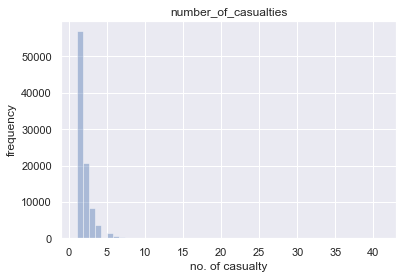

In [ ]:
# Histogram
# Define plot object
hist = sns.distplot(df_filtered.loc[:, 'number_of_casualties'].astype(float), kde=False)
# Setting graph title
hist.set_title('number_of_casualties')
hist.set(xlabel='no. of casualty', ylabel='frequency')
plt.show()
# Removing outliers
df_filtered = df_filtered[df_filtered.number_of_casualties != 41]

In [ ]:
# Checking if the outlier got removed
print(df_filtered["number_of_casualties"].value_counts())

1     56930
2     20666
3      8409
4      3692
5      1510
6       624
7       287
8        96
9        54
11       33
10       30
19       19
17       17
13       13
12       12
Name: number_of_casualties, dtype: int64


### **5.0 Splitting Data into Training and Testing**

The dataset is split into train and test data for training and testing the predictive model. Random sampling has been used as the splitting method.


In [ ]:
# Importing necessary libraries
from numpy.ma.core import shape
from sklearn.model_selection import train_test_split

# Converting the data set into predictor and target variables based on accident severity as target
X_accident = df_filtered.drop("accident_severity", axis=1)
y_accident = df_filtered["accident_severity"]

# Splitting into train and test set based on casualty severity as the target variable
x_accident_train, x_accident_test, y_accident_train, y_accident_test = \
train_test_split(X_accident, y_accident, test_size=0.3, random_state=42)

In [ ]:
# Shape of the resultant dataframes
print(x_accident_train.shape)
print(x_accident_test.shape)
print(y_accident_train.shape)
print(y_accident_test.shape)

(64674, 27)
(27718, 27)
(64674,)
(27718,)


### **6. Desriptive Statisitics on Training Dataset**

This section conducts an Exploratory Data Analysis on the variables of the dataframe one at a time. The EDA is discussed in three sections namely dependent variable, numeric independent variables and categorical independant variables. This analysis will give us further insights for feature scaling feature importance, while helping us find patterns in predictor variables.

Numerical variables are described using histograms and boxplots, which will help in diagnosing skewness and distribution of values in a variable.
Categoical variables are best projected using barplots, helping understand imbalance of data categories.
Every analysis done in the section is done on x_accident_train and y_accident_train dataframes.
For the first purpose of the analysis, the following functions were created:




In [ ]:
# Function for plotting numerical variables
# ==========================================
def numerical_plot(dataframe, column_name):
    pd.DataFrame(dataframe.loc[:, column_name].describe())
    heading = column_name.replace('_', ' ')
    fig = plt.figure(figsize=(15, 5))
    # Histogram
    plt.subplot(1, 2, 1)
    # Define plot object
    hist = sns.distplot(x_accident_train.loc[:, column_name], bins=100)
    # Setting graph title
    hist.set_title('Average {}'.format(heading))
    hist.set(xlabel='{}'.format(heading), ylabel='Frequency')
    # Boxplot
    plt.subplot(1, 2, 2)
    # Define plot object
    box = sns.boxplot(x_accident_train.loc[:, column_name])
    # Setting graph title
    box.set_title('Average {}'.format(heading))
    box.set(xlabel='{}'.format(heading), ylabel='Frequency')
    # Showing the plot
    plt.show()

In [ ]:
# Function for plotting categorical variables
# ============================================
def categorical_plot(dataframe, column_name, labels, bins):
    heading = column_name.replace('_', ' ')
    plot_usage_dataframe = pd.cut(dataframe[column_name], bins=bins, labels=labels)
    # Plotting the bar graph to display the frequency of impact on each portion of the vehicle
    plot_usage_dataframe.value_counts().plot(kind='bar')
    plt.title(label=column_name)
    plt.xlabel(xlabel='{}'.format(heading))
    plt.ylabel(ylabel='Frequency')
    plt.show()


**6.1 Dependent Variable**

The accident_severity is chosen for the predictive model as its dependent variable.

**6.2 Numeric Independent Variables**

The following columns are Numeric Independent Variables and are investigated below.

*   number_of_casualties
*   speed_limit
*   age_of_vehicle
*   engine_capacity_cc
*   number_of_vehicles


**6.2.1 Number of Casualties**

Descriptive statistics of Number of Casualties.

In [ ]:
pd.DataFrame(x_accident_train.number_of_casualties.describe())

,number_of_casualties
count,64674.000000
mean,1.674692
std,1.157310
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


The distribution and skewness of this variable are illustrated by the histogram and box plot below.

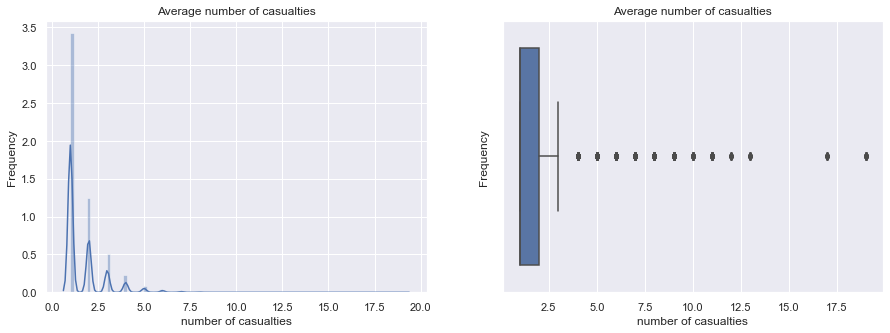

In [ ]:
numerical_plot(x_accident_train,'number_of_casualties')

The average number of casualties is between 1 and 20. The outliers are above 20 casualties.

**6.2.2 Speed Limit**

Descriptive statistics of Speed Limit.

In [ ]:
pd.DataFrame(x_accident_train.speed_limit.describe())

,speed_limit
count,64667.000000
mean,39.395982
std,14.618843
min,20.000000
25%,30.000000
50%,30.000000
75%,50.000000
max,70.000000


The distribution and skewness of this variable are illustrated by the histogram and box plot below.

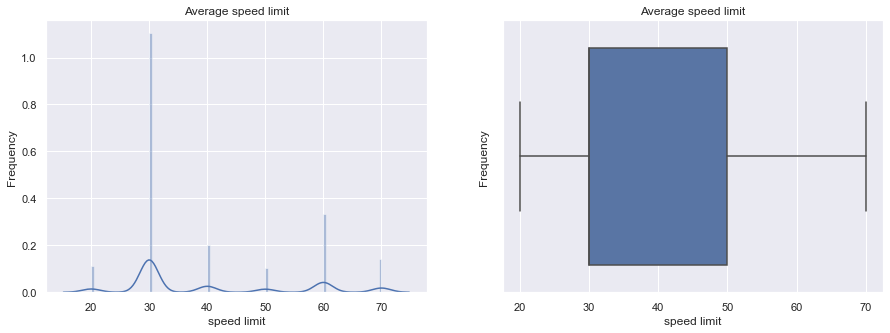

In [ ]:
numerical_plot(x_accident_train, 'speed_limit')

The average speed limit is between 

**6.2.3 Age of Vehicle**

Descriptive statistics of age of the vehicle.

In [ ]:
pd.DataFrame(x_accident_train.age_of_vehicle.describe())

,age_of_vehicle
count,48693.000000
mean,8.597273
std,5.866345
min,0.000000
25%,4.000000
50%,8.000000
75%,13.000000
max,96.000000


The distribution and skewness of this variable are illustrated by the histogram and box plot below.

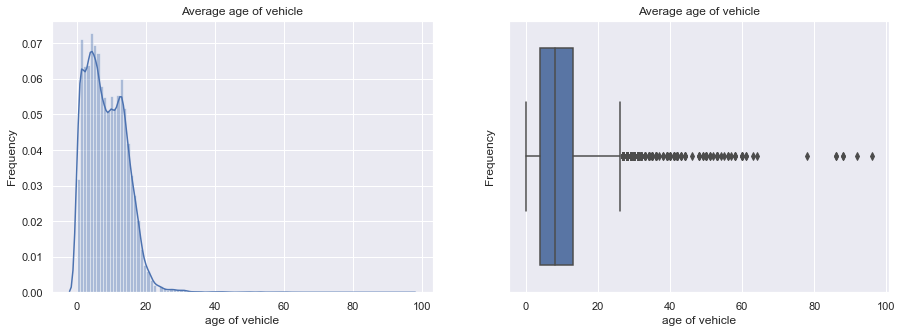

In [ ]:
numerical_plot(x_accident_train, 'age_of_vehicle')

Blah blah blah...............

**6.2.4 Engine Capacity (cc)**

Descriptive statistics of Engine Capacity.

In [ ]:
pd.DataFrame(x_accident_train.engine_capacity_cc.describe())

,engine_capacity_cc
count,48568.000000
mean,1641.953550
std,1168.875374
min,48.000000
25%,1229.000000
50%,1560.000000
75%,1968.000000
max,16400.000000


The distribution and skewness of this variable are illustrated by the histogram and box plot below.

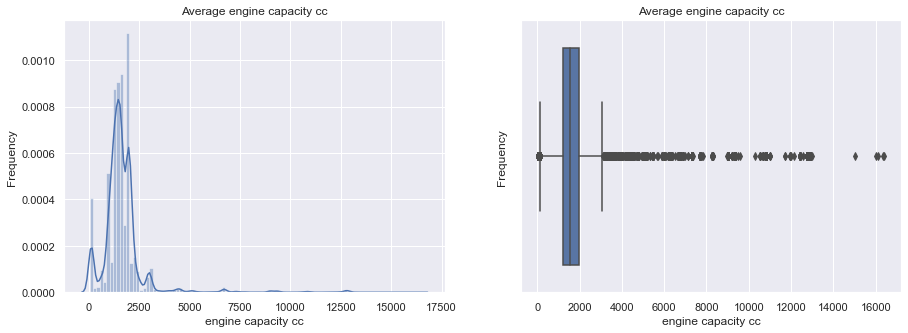

In [ ]:
numerical_plot(x_accident_train, 'engine_capacity_cc')

**6.2.5 Number of Vehicles**

Descriptive statistics of Number of Vehicles.

In [ ]:
pd.DataFrame(x_accident_train.number_of_vehicles.describe())

,number_of_vehicles
count,64674.000000
mean,1.916350
std,0.755002
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,13.000000


The distribution and skewness of this variable are illustrated by the histogram and box plot below.

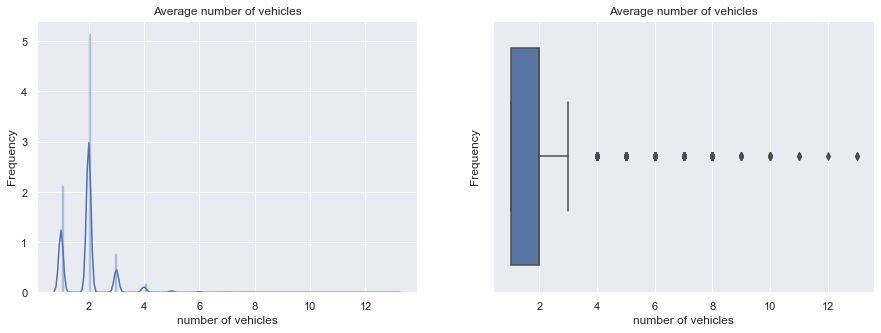

In [ ]:
numerical_plot(x_accident_train, 'number_of_vehicles')

**6.3 Categorical Independent Variables**

The following coloumns are Categorical Independent Variables and are investigated below.


*   first_point_of_impact
*   trunk_road_flag
*   urban_or_rural_area
*   age_band_of_casualty
*   vehicle_leaving_carriageway
*   light_conditions
*   casualty_class
*   age_band_of_driver
*   road_type
*   driver_home_area_type
*   skidding_and_overturning
*   driver_imd_decile
*   weather_conditions
*   vehicle_location_restricted_lane
*   junction_location
*   second_road_class
*   sex_of_casualty
*   did_police_officer_attend_scene_of_accident
*   casualty_severity




**6.3.1 First Point of Impact**

Descriptive statistics and value counts for First point of Impact variable.

In [ ]:
pd.DataFrame(x_accident_train.first_point_of_impact.describe())

,first_point_of_impact
count,63930.000000
mean,1.802206
std,1.141657
min,0.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,4.000000


The plot below illustrates the 'counts' for this variable.

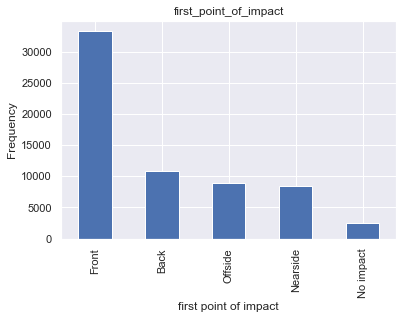

In [ ]:
categorical_plot(x_accident_train, 'first_point_of_impact',
                  ['No impact', 'Front', 'Back', 'Offside', 'Nearside'], 5)

Most of First point of Impacts are on the front of the vehicle.



**6.3.2 Trunk Road Flag**

Descriptive statistics and value counts for Trunk Road Flag variable.

In [ ]:
pd.DataFrame(x_accident_train.trunk_road_flag.describe())

,trunk_road_flag
count,60393.000000
mean,1.910685
std,0.285200
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


The plot below illustrates the 'counts' for this variable.

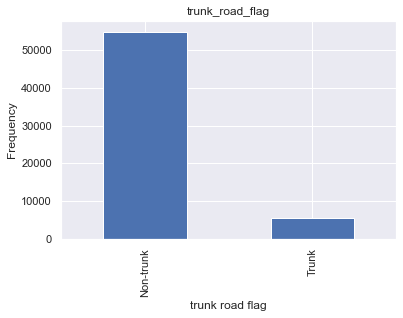

In [ ]:
categorical_plot(x_accident_train, 'trunk_road_flag', ['Trunk', 'Non-trunk'], 2)

Most of the accidents have occured on Non-Trunk Roads

**6.3.3 Urban or Rural Area**

Descriptive statistics and value counts for Urban or Rural Area variable.

In [ ]:
pd.DataFrame(x_accident_train.urban_or_rural_area.describe())

,urban_or_rural_area
count,64674.000000
mean,1.420617
std,0.493662
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


The plot below illustrates the 'counts' for this variable.

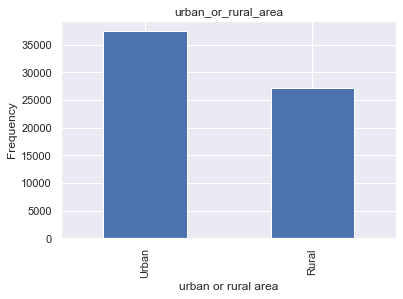

In [ ]:
categorical_plot(x_accident_train, 'urban_or_rural_area', ['Urban', 'Rural'], 2)

Most of the accidents have occured in Urban areas but rural incidents are just a bit less frequent.

**6.3.4 Age Band of Casualty**

Descriptive statistics and value counts for Age Band of Casualty variable.

In [ ]:
pd.DataFrame(x_accident_train.age_band_of_casualty.describe())

,age_band_of_casualty
count,63650.000000
mean,6.478162
std,2.224915
min,1.000000
25%,5.000000
50%,6.000000
75%,8.000000
max,11.000000


The plot below illustrates the 'counts' for this variable.

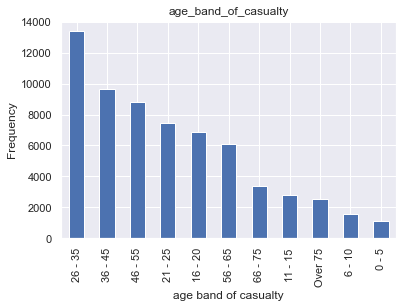

In [ ]:
categorical_plot(x_accident_train, 'age_band_of_casualty', ["0 - 5", "6 - 10", "11 - 15", "16 - 20", "21 - 25",
                                                                "26 - 35", "36 - 45", "46 - 55", "56 - 65", "66 - 75",
                                                                "Over 75"], 11)

The age band involved with the most number of accidents is between 26 - 35.

**6.3.5 Vehicle Leaving Carriageway**

Descriptive statistics and value counts for Vehicle Leaving Carriageway variable.

In [ ]:
pd.DataFrame(x_accident_train.vehicle_leaving_carriageway.describe())

,vehicle_leaving_carriageway
count,64417.000000
mean,0.716752
std,1.969479
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


The plot below illustrates the 'counts' for this variable.

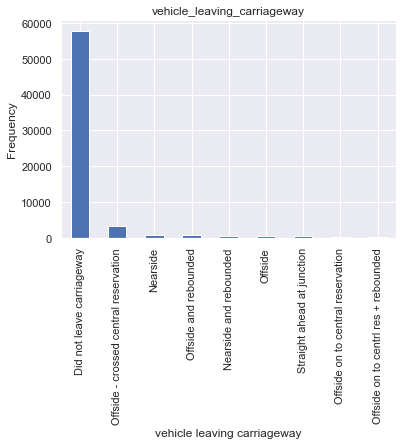

In [ ]:
categorical_plot(x_accident_train, 'vehicle_leaving_carriageway', ["Did not leave carriageway", "Nearside",
                                                                       "Nearside and rebounded",
                                                                       "Straight ahead at junction",
                                                                       "Offside on to central reservation",
                                                                       "Offside on to centrl res + rebounded",
                                                                       "Offside - crossed central reservation",
                                                                       "Offside", "Offside and rebounded"], 9)

It can be observed that most vehicles did not leave the carriageway.

**6.3.6 Light Conditions**

Descriptive statistics and value counts for Light Conditions variable.

In [ ]:
pd.DataFrame(x_accident_train.light_conditions.describe())

,light_conditions
count,64673.000000
mean,2.110927
std,1.784249
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,7.000000


The plot below illustrates the 'counts' for this variable.

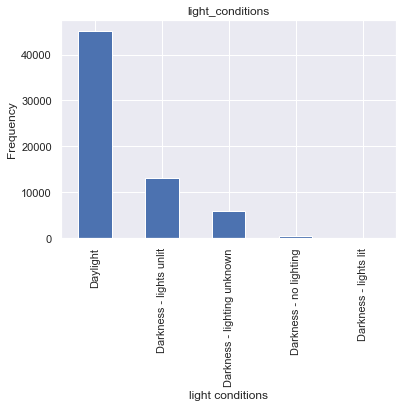

In [ ]:
categorical_plot(x_accident_train, 'light_conditions', ["Daylight", "Darkness - lights lit",
                                                            "Darkness - lights unlit", "Darkness - no lighting",
                                                            "Darkness - lighting unknown"], 5)

Most of the accidents have occurred during Daylight hours.

**6.3.7 Casualty Class**

Descriptive statistics and value counts for Casualty Class variable.

In [ ]:
pd.DataFrame(x_accident_train.casualty_class.describe())

,casualty_class
count,64674.000000
mean,1.440208
std,0.701671
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


The plot below illustrates the 'counts' for this variable.

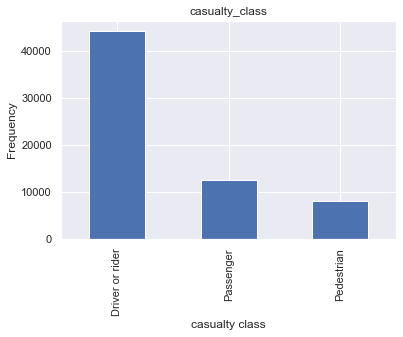

In [ ]:
categorical_plot(x_accident_train, 'casualty_class', ["Driver or rider", "Passenger", "Pedestrian"], 3)

The most occuring casualty class is the Driver or rider of the vehicle.

**6.3.8 Age Band of Driver**

Descriptive statistics and value counts for Age Band of Driver variable.

In [ ]:
pd.DataFrame(x_accident_train.age_band_of_driver.describe())

,age_band_of_driver
count,62054.000000
mean,6.827876
std,1.863367
min,1.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,11.000000


The plot below illustrates the 'counts' for this variable.

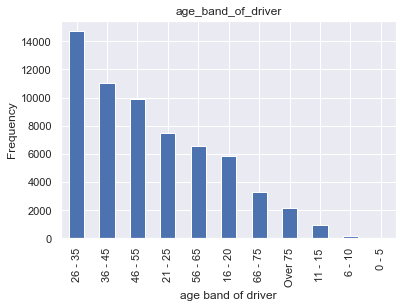

In [ ]:
categorical_plot(x_accident_train, 'age_band_of_driver', ["0 - 5", "6 - 10", "11 - 15", "16 - 20", "21 - 25",
                                                              "26 - 35", "36 - 45", "46 - 55", "56 - 65", "66 - 75",
                                                              "Over 75"], 11)

The age band involved with the most number of accidents is between 26 - 35.

**6.3.9 Road Type**

Descriptive statistics and value counts for Road Type variable.

In [ ]:
pd.DataFrame(x_accident_train.road_type.describe())

,road_type
count,64166.000000
mean,5.225462
std,1.547770
min,1.000000
25%,6.000000
50%,6.000000
75%,6.000000
max,7.000000


The plot below illustrates the 'counts' for this variable.

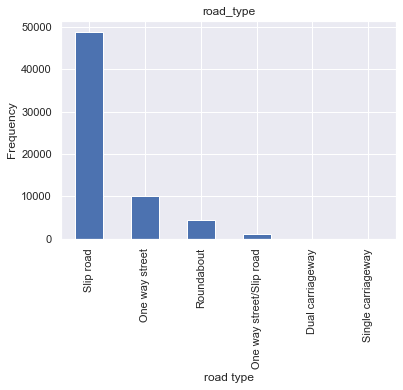

In [ ]:
categorical_plot(x_accident_train, 'road_type', ["Roundabout", "One way street", "Dual carriageway",
                                                     "Single carriageway", "Slip road", "One way street/Slip road"], 6)

Most of the accidents occur on  Slip Roads.

**6.3.10 Driver Home Area Type**

Descriptive statistics and value counts for Driver Home Area Type variable.

In [ ]:
pd.DataFrame(x_accident_train.driver_home_area_type.describe())

,driver_home_area_type
count,58796.000000
mean,1.351486
std,0.691378
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


The plot below illustrates the 'counts' for this variable.

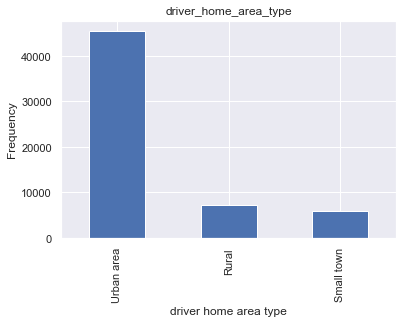

In [ ]:
categorical_plot(x_accident_train, 'driver_home_area_type', ["Urban area", "Small town", "Rural"], 3)

Most of the accidents occur in Urban areas.

**6.3.11 Skidding and Overturning**

Descriptive statistics and value counts for Skidding and Overturning variable.

In [ ]:
pd.DataFrame(x_accident_train.skidding_and_overturning.describe())

,skidding_and_overturning
count,63528.000000
mean,0.371159
std,1.068877
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.000000


The plot below illustrates the 'counts' for this variable.

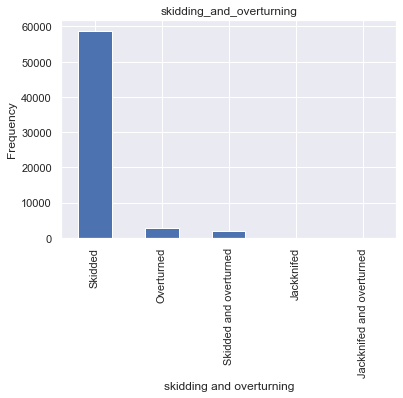

In [ ]:
categorical_plot(x_accident_train, 'skidding_and_overturning',
                     ['Skidded', 'Skidded and overturned', 'Jackknifed', 'Jackknifed and overturned', 'Overturned'], 5)

Most of the Vehicles have just skidded during an accident.

**6.3.12 Driver imd Decile**

Descriptive statistics and value counts for Driver imd Decile variable.

In [ ]:
pd.DataFrame(x_accident_train.skidding_and_overturning.describe())

,skidding_and_overturning
count,63528.000000
mean,0.371159
std,1.068877
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.000000


The plot below illustrates the 'counts' for this variable.

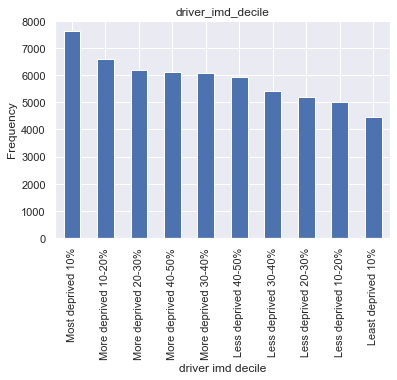

In [ ]:
categorical_plot(x_accident_train, 'driver_imd_decile',
                     ['Most deprived 10%', 'More deprived 10-20%', 'More deprived 20-30%', 'More deprived 30-40%',
                      'More deprived 40-50%', 'Less deprived 40-50%', 'Less deprived 30-40%', 'Less deprived 20-30%',
                      'Less deprived 10-20%', 'Least deprived 10%'], 10)

The highest number of incidents have occured in the most deprived 10% areas but the other areas are more or less equally distributed.

**6.3.13 Weather Conditions**

Descriptive statistics and value counts for Weather Conditions variable.

In [ ]:
pd.DataFrame(x_accident_train.weather_conditions.describe())

,weather_conditions
count,63352.000000
mean,1.492565
std,1.366141
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,8.000000


The plot below illustrates the 'counts' for this variable.

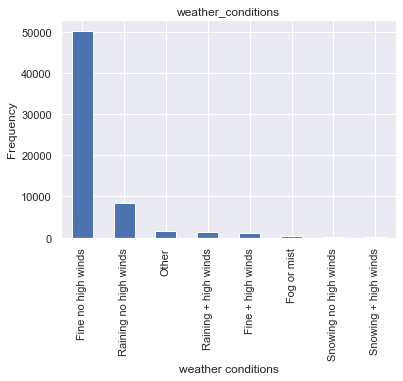

In [ ]:
categorical_plot(x_accident_train, 'weather_conditions',
                     ["Fine no high winds", "Raining no high winds", "Snowing no high winds", "Fine + high winds",
                      "Raining + high winds", "Snowing + high winds", "Fog or mist", "Other"], 8)

Most of the accidents happened when the weather was fine with no high winds.

**6.3.14 Vehicle Location Restricted Lane**

Descriptive statistics and value counts for Vehicle Location Restricted Lane variable.

In [ ]:
pd.DataFrame(x_accident_train.vehicle_location_restricted_lane.describe())

,vehicle_location_restricted_lane
count,63557.000000
mean,0.202165
std,1.248886
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


The plot below illustrates the 'counts' for this variable.

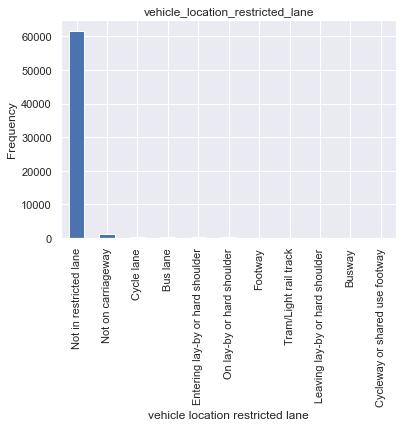

In [ ]:
categorical_plot(x_accident_train, 'vehicle_location_restricted_lane',
                     ["Not in restricted lane", "Tram/Light rail track", "Bus lane", "Busway", "Cycle lane",
                      "Cycleway or shared use footway", "On lay-by or hard shoulder",
                      "Entering lay-by or hard shoulder", "Leaving lay-by or hard shoulder", "Footway",
                      "Not on carriageway"], 11)

Most of the vehicles were not in the restricted lane when it got into an acciendent.

**6.3.15 Junction Location**

Descriptive statistics and value counts for Junction Location variable.

In [ ]:
pd.DataFrame(x_accident_train.junction_location.describe())

,junction_location
count,64556.000000
mean,2.226997
std,3.098456
min,0.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,9.000000


The plot below illustrates the 'counts' for this variable.

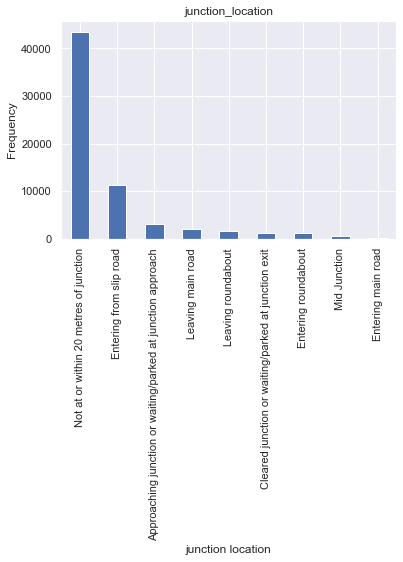

In [ ]:
categorical_plot(x_accident_train, 'junction_location',
                     ["Not at or within 20 metres of junction",
                      "Approaching junction or waiting/parked at junction approach",
                      "Cleared junction or waiting/parked at junction exit", "Leaving roundabout", "Entering roundabout"
                         , "Leaving main road", "Entering main road", "Entering from slip road", "Mid Junction"], 9)

Most of the vehicles were not at or within 20 metres of a junction when it met with an accident.

**6.3.16 Second Road Class**

Descriptive statistics and value counts for Second Road Class variable.

junction_control
sex_of_casualty
did_police_officer_attend_scene_of_accident
casualty_severity

In [ ]:
pd.DataFrame(x_accident_train.second_road_class.describe())

,second_road_class
count,64674.000000
mean,2.804172
std,2.779221
min,-1.000000
25%,0.000000
50%,3.000000
75%,6.000000
max,6.000000


The plot below illustrates the 'counts' for this variable.

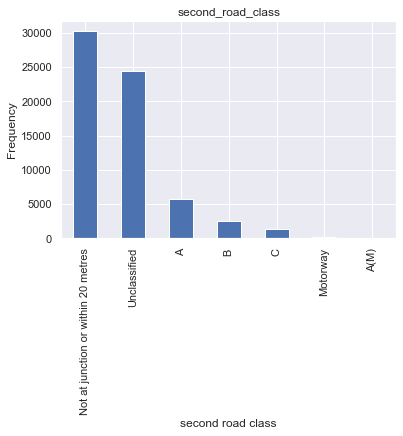

In [ ]:
categorical_plot(x_accident_train, 'second_road_class',
                     ["Not at junction or within 20 metres", "Motorway", "A(M)", "A", "B", "C", "Unclassified"], 7)

**6.3.17 Sex of Casualty**

Descriptive statistics and value counts for Sex of Casualty variable.

did_police_officer_attend_scene_of_accident
casualty_severity

In [ ]:
pd.DataFrame(x_accident_train.sex_of_casualty.describe())

,sex_of_casualty
count,64537.000000
mean,1.382323
std,0.485959
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


The plot below illustrates the 'counts' for this variable.

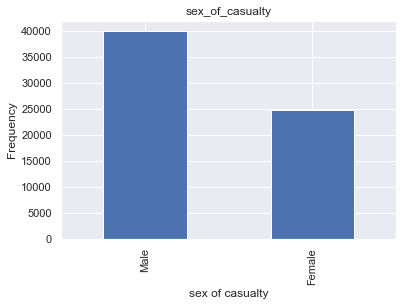

In [ ]:
categorical_plot(x_accident_train, 'sex_of_casualty', ["Male", "Female"], 2)

More males are involved in accidents compared to females.

**6.3.18 Did Police Officer Attend Scene of Accident**

Descriptive statistics and value counts for Did Police Officer Attend Scene of Accident variable.

casualty_severity

In [ ]:
pd.DataFrame(x_accident_train.did_police_officer_attend_scene_of_accident.describe())

,did_police_officer_attend_scene_of_accident
count,64673.000000
mean,1.268767
std,0.443322
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


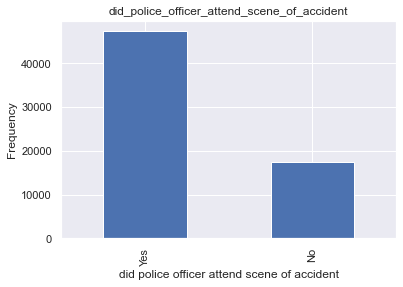

In [ ]:
categorical_plot(x_accident_train, 'did_police_officer_attend_scene_of_accident', ["Yes", "No"], 2)

In most of the cases, a police had attended the scene of the accident.

**6.3.19 Casualty Severity**

Descriptive statistics and value counts for Casualty Severity variable.


In [ ]:
pd.DataFrame(x_accident_train.casualty_severity.describe())

,casualty_severity
count,64674.000000
mean,2.790534
std,0.440504
min,1.000000
25%,3.000000
50%,3.000000
75%,3.000000
max,3.000000


The plot below illustrates the 'counts' for this variable.

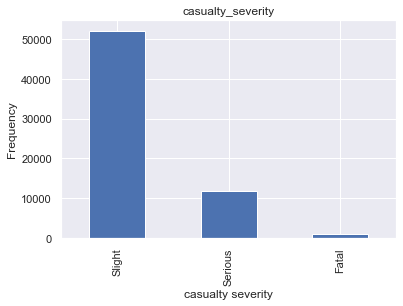

In [ ]:
categorical_plot(x_accident_train, 'casualty_severity', ["Fatal", "Serious", "Slight"], 3)

The casualty severity of most cases is slight meaning no major damage was dealt.

**6.4 Special Variables**

The numeric variables Longitude and Latitude can be used to map out the various locations in which accidents have occurred. These locations can be further assesed to provide better facilities in accident-prone areas.

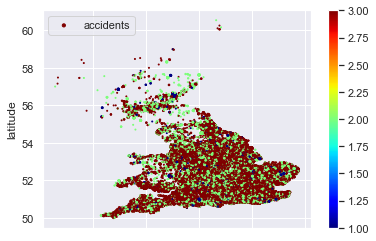

In [ ]:
# Plotting the accident severity observed using latitude and longitude
x_accident_train.plot(kind="scatter", x="longitude", y="latitude", s=x_accident_train["number_of_casualties"],
                      label="accidents", alpha=1, c=y_accident_train, cmap=plt.get_cmap("jet"), colorbar=True, )
plt.legend()
plt.show()

The following plot shows the general outline of the UK using all the various instances of accidents for the year 2020.

**7.0 Data Cleaning**


In [ ]:
x_accident_train.drop(['latitude', 'longitude'], inplace= True, axis=1)
x_accident_test.drop(['latitude', 'longitude'], inplace=True, axis =1)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

def category_missing(trainset, column):
    one_hot_encoder = OneHotEncoder(drop="first", sparse=False)
    cat_vals = trainset[column].values.reshape(-1, 1)
    transformed = one_hot_encoder.fit_transform(cat_vals)
    # put the transformed data as columns in the dataframe
    col_names = one_hot_encoder.categories_[0].tolist()[1:]
    for i, col_name in enumerate(col_names):
        heading = column+'_'+str(int(col_name))
        trainset[heading] = transformed[:, i]
    return trainset

In [ ]:
# Data imputation
# ===============
imputer = SimpleImputer(strategy="median")

# we create a temporary dataframe with only numerical columns,
# but keep the categorical columns in a separate variable
trainset_numerical = x_accident_train[["speed_limit", "age_of_vehicle", "engine_capacity_cc", "number_of_casualties", "number_of_vehicles"]]
testset_numerical = x_accident_test[["speed_limit", "age_of_vehicle", "engine_capacity_cc", "number_of_casualties", "number_of_vehicles"]]
trainset_categorical = x_accident_train.drop(["speed_limit", "age_of_vehicle", "engine_capacity_cc", "number_of_casualties", "number_of_vehicles"], axis=1)
testset_categorical = x_accident_test.drop(["speed_limit", "age_of_vehicle", "engine_capacity_cc", "number_of_casualties", "number_of_vehicles"], axis=1)

categorical_columns = list(trainset_categorical.columns)

# Numerical dataset imputation
transformed_train_numerical = imputer.fit_transform(trainset_numerical)
transformed_test_numerical = imputer.transform(testset_numerical)
x_accident_train_numerical = pd.DataFrame(transformed_train_numerical,
                                          columns=["speed_limit", "age_of_vehicle", "engine_capacity_cc", "number_of_casualties", "number_of_vehicles"])
x_accident_test_numerical = pd.DataFrame(transformed_test_numerical,
                                          columns=["speed_limit", "age_of_vehicle", "engine_capacity_cc", "number_of_casualties", "number_of_vehicles"])

imputer = SimpleImputer(strategy="most_frequent")
transformed_train_categorical = imputer.fit_transform(trainset_categorical)
transformed_test_categorical = imputer.transform(testset_categorical)
x_accident_train_categorical = pd.DataFrame(transformed_train_categorical, columns=categorical_columns)
x_accident_test_categorical = pd.DataFrame(transformed_test_categorical, columns=categorical_columns)

x_accident_train = pd.merge(x_accident_train_numerical,x_accident_train_categorical, left_index=True, right_index=True, how='outer')
x_accident_test = pd.merge(x_accident_test_numerical,x_accident_test_categorical, left_index=True, right_index=True, how='outer')

In [ ]:
trainset_numerical = x_accident_train[["speed_limit", "age_of_vehicle", "engine_capacity_cc", "number_of_casualties", "number_of_vehicles"]]
testset_numerical = x_accident_test[["speed_limit", "age_of_vehicle", "engine_capacity_cc", "number_of_casualties", "number_of_vehicles"]]
trainset_categorical = x_accident_train.drop(["speed_limit", "age_of_vehicle", "engine_capacity_cc", "number_of_casualties", "number_of_vehicles"], axis=1)
testset_categorical = x_accident_test.drop(["speed_limit", "age_of_vehicle", "engine_capacity_cc", "number_of_casualties", "number_of_vehicles"], axis=1)
for element in categorical_columns:
    trainset_categorical = category_missing(trainset_categorical, element)
    testset_categorical = category_missing(testset_categorical, element)
x_accident_train = pd.merge(trainset_numerical, trainset_categorical, left_index=True,
                            right_index=True, how='outer')
x_accident_test = pd.merge(testset_numerical, testset_categorical, left_index=True,
                            right_index=True, how='outer')

**8.0 Conclusion**

This group project was successfully able to explore important variables from accident, casuality and vehicle datasets. Features were selected based on predictors that can be obtained immediately from the crash site and have a high correlation with accident severity. By predicting the dataset explored above, emergency services should be able to prioritise first aid dispatch to the required accident site.
The individual project executed by each group member will execute ML algorithms to predict accident severity on y_accident_test and discuss its accuracy.

In [ ]:
x_accident_train.drop(["junction_location", "second_road_class", "did_police_officer_attend_scene_of_accident", "casualty_severity", "sex_of_casualty", "sex_of_driver", "vehicle_location_restricted_lane", "number_of_vehicles", "weather_conditions", "driver_imd_decile", "skidding_and_overturning", "driver_home_area_type", "road_type", "age_band_of_driver", "casualty_class", "light_conditions", "vehicle_leaving_carriageway", "age_band_of_casualty", "number_of_casualties", "urban_or_rural_area", "trunk_road_flag", "first_point_of_impact"],inplace=True, axis=1)
x_accident_test.drop(["junction_location", "second_road_class","did_police_officer_attend_scene_of_accident", "casualty_severity", "sex_of_casualty", "sex_of_driver", "vehicle_location_restricted_lane", "number_of_vehicles", "weather_conditions", "driver_imd_decile", "skidding_and_overturning", "driver_home_area_type", "road_type", "age_band_of_driver", "casualty_class", "light_conditions", "vehicle_leaving_carriageway", "age_band_of_casualty", "number_of_casualties", "urban_or_rural_area", "trunk_road_flag", "first_point_of_impact"],inplace=True, axis=1)

In [ ]:
x_accident_test.shape

(27718, 101)

In [ ]:
pd.set_option('display.max_columns', None)
x_accident_train.head()

,speed_limit,age_of_vehicle,engine_capacity_cc,first_point_of_impact_1,first_point_of_impact_2,first_point_of_impact_3,first_point_of_impact_4,trunk_road_flag_2,urban_or_rural_area_2,age_band_of_casualty_2,age_band_of_casualty_3,age_band_of_casualty_4,age_band_of_casualty_5,age_band_of_casualty_6,age_band_of_casualty_7,age_band_of_casualty_8,age_band_of_casualty_9,age_band_of_casualty_10,age_band_of_casualty_11,vehicle_leaving_carriageway_1,vehicle_leaving_carriageway_2,vehicle_leaving_carriageway_3,vehicle_leaving_carriageway_4,vehicle_leaving_carriageway_5,vehicle_leaving_carriageway_6,vehicle_leaving_carriageway_7,vehicle_leaving_carriageway_8,vehicle_leaving_carriageway_9,light_conditions_4,light_conditions_5,light_conditions_6,light_conditions_7,casualty_class_2,casualty_class_3,age_band_of_driver_2,age_band_of_driver_3,age_band_of_driver_4,age_band_of_driver_5,age_band_of_driver_6,age_band_of_driver_7,age_band_of_driver_8,age_band_of_driver_9,age_band_of_driver_10,age_band_of_driver_11,road_type_2,road_type_3,road_type_6,road_type_7,driver_home_area_type_2,driver_home_area_type_3,skidding_and_overturning_1,skidding_and_overturning_2,skidding_and_overturning_3,skidding_and_overturning_4,skidding_and_overturning_5,driver_imd_decile_2,driver_imd_decile_3,driver_imd_decile_4,driver_imd_decile_5,driver_imd_decile_6,driver_imd_decile_7,driver_imd_decile_8,driver_imd_decile_9,driver_imd_decile_10,weather_conditions_2,weather_conditions_3,weather_conditions_4,weather_conditions_5,weather_conditions_6,weather_conditions_7,weather_conditions_8,vehicle_location_restricted_lane_1,vehicle_location_restricted_lane_2,vehicle_location_restricted_lane_3,vehicle_location_restricted_lane_4,vehicle_location_restricted_lane_5,vehicle_location_restricted_lane_6,vehicle_location_restricted_lane_7,vehicle_location_restricted_lane_8,vehicle_location_restricted_lane_9,junction_location_1,junction_location_2,junction_location_3,junction_location_4,junction_location_5,junction_location_6,junction_location_7,junction_location_8,junction_location_9,second_road_class_0,second_road_class_1,second_road_class_2,second_road_class_3,second_road_class_4,second_road_class_5,second_road_class_6,sex_of_casualty_2,sex_of_driver_2,did_police_officer_attend_scene_of_accident_2,casualty_severity_2,casualty_severity_3
0,60.0,4.0,1499.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,30.0,16.0,1598.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,40.0,6.0,1398.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40.0,8.0,1560.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.0,8.0,1560.0,1.0,0.0,0.0,0.0,1.0,

In [ ]:
x_accident_train.shape

(64674, 101)

**9.0 Data Exporting**

After the conclusion of the Group assignment, we can now pass on the transformed and split datasets to the Individual assignment by
exporting them to csv files.

In [ ]:
# x_accident_train.to_csv("/content/gdrive/My Drive/Colab Notebooks/Content/x_accident_train.csv")
# x_accident_test.to_csv("/content/gdrive/My Drive/Colab Notebooks/Content/x_accident_test.csv")
# y_accident_train.to_csv("/content/gdrive/My Drive/Colab Notebooks/Content/y_accident_train.csv")
# y_accident_test.to_csv("/content/gdrive/My Drive/Colab Notebooks/Content/y_accident_test.csv")

## Setting up a baseline


In [ ]:
from sklearn.model_selection import GridSearchCV
print(y_accident_train.value_counts())

3    48868
2    14430
1     1376
Name: accident_severity, dtype: int64


The baseline prediction would be 3 because 3 is the most probable outcome.

In [ ]:
ef = [3] * 64674

## Decision Tree


In [ ]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
#We will search for the best hyperparameters for the decision trees, using GridSearch
# and thus cross-validation. We give here several combinations for the hyperparameters to compare. 
model = DecisionTreeClassifier()
model.fit(x_accident_train, y_accident_train)
y_hat = model.predict(x_accident_test)



In [ ]:
# details on the best model for the decision tree algorithm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_accident_test, y_hat))
print(confusion_matrix(y_accident_test, y_hat))


              precision    recall  f1-score   support

           1       0.64      0.70      0.67       576
           2       0.80      0.82      0.81      6289
           3       0.95      0.94      0.94     20853

    accuracy                           0.91     27718
   macro avg       0.80      0.82      0.81     27718
weighted avg       0.91      0.91      0.91     27718

[[  401    94    81]
 [  131  5144  1014]
 [   92  1218 19543]]


## Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=7)

# specify the hyperparameters and their values
# 4 x 2 x 2 = 16 combinations in the grid
param_grid = {
    'n_estimators': [10, 100, 200, 1000],
    'max_depth': [5, 15],
    'min_samples_split': [5, 10]
}

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True) 

start = time.time()
grid_search.fit(x_accident_train, y_accident_train)
end = time.time() - start
print(f"Took {end} seconds")

Took 617.7965931892395 seconds


In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=5, random_state=7)

In [ ]:
grid_search.best_score_

0.8856118561353329

In [ ]:
best_model_index = grid_search.cv_results_["rank_test_score"].tolist().index(1)
best_model_index

9

In [ ]:
rf_split_test_scores = []
for x in range(5):
    # extract f-score of the best model (index='best_model_index') from each of the 5 splits
    val = grid_search.cv_results_[f"split{x}_test_score"][best_model_index]
    rf_split_test_scores.append(val)

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
9,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}",0.888821,0.885612,0.361110
10,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}",0.888488,0.885577,0.327673
11,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 1000}",0.888466,0.885378,0.347568
13,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 100}",0.886020,0.884967,0.118810
15,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 1000}",0.885858,0.884943,0.103240
14,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 200}",0.885930,0.884767,0.131188
8,"{'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 10}",0.887045,0.872245,1.668422
12,"{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 10}",0.880311,0.866219,1.600763
3,"{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 1000}",0.612732,0.612727,0.000809
6,"{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}",0.612722,0.612727,-0.000835


The performance of Random Forest classifiers varies a lot across the runs, between 0.54 and 0.81 on the validation set. In particular, we notice that better performance is achieved with greater values of `max_depth`.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
import os
from joblib import dump
from joblib import load
# create a folder where all trained models will be kept
if not os.path.exists("models"): os.makedirs("models")
dump(grid_search.best_estimator_, 'models/rf_reg.joblib')

['models/rf_reg.joblib']

In [ ]:
loaded_model = load('models/rf_reg.joblib')
y_hat_rf = loaded_model.predict(x_accident_test)

In [ ]:
print(classification_report(y_accident_test, y_hat_rf))
print(confusion_matrix(y_accident_test, y_hat_rf))

              precision    recall  f1-score   support

           1       1.00      0.66      0.79       576
           2       0.98      0.80      0.88      6289
           3       0.94      1.00      0.97     20853

    accuracy                           0.95     27718
   macro avg       0.97      0.82      0.88     27718
weighted avg       0.95      0.95      0.94     27718

[[  379    99    98]
 [    0  5024  1265]
 [    0     0 20853]]


### SVM for classification

In [ ]:
from sklearn.svm import LinearSVC

lsvm = LinearSVC(random_state=7)

# specify the hyperparameters and their values
# 6 combinations in the grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 3, 5],
    'max_iter': [5000]
}

# we'll use 5-fold cross-validation
grid_search = GridSearchCV(lsvm, param_grid, cv=5, scoring='f1_macro', return_train_score=True) 

start = time.time()
grid_search.fit(x_accident_train, y_accident_train)
end = time.time() - start
print(f"Took {end} seconds")

Took 1749.5677330493927 seconds


In [ ]:
grid_search.best_estimator_


LinearSVC(C=1, max_iter=5000, random_state=7)

In [ ]:
grid_search.best_score_

0.8805591607745555

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
3,"{'C': 1, 'max_iter': 5000}",0.881436,0.880559,0.099524
1,"{'C': 0.01, 'max_iter': 5000}",0.879647,0.879991,-0.039182
5,"{'C': 5, 'max_iter': 5000}",0.869913,0.869558,0.040871
4,"{'C': 3, 'max_iter': 5000}",0.868625,0.868184,0.050764
0,"{'C': 0.001, 'max_iter': 5000}",0.836870,0.832504,0.521687
2,"{'C': 0.1, 'max_iter': 5000}",0.674654,0.674452,0.029960


In [ ]:
dump(grid_search.best_estimator_, 'models/svm_reg.joblib')

['models/svm_reg.joblib']

In [ ]:
loaded_model_svm = load('models/svm_reg.joblib')
y_hat_svm = loaded_model_svm.predict(x_accident_test)

In [ ]:
print(classification_report(y_accident_test, y_hat_svm))
print(confusion_matrix(y_accident_test, y_hat_svm))

              precision    recall  f1-score   support

           1       1.00      0.65      0.79       576
           2       0.98      0.80      0.88      6289
           3       0.94      1.00      0.97     20853

    accuracy                           0.95     27718
   macro avg       0.97      0.82      0.88     27718
weighted avg       0.95      0.95      0.94     27718

[[  375   100   101]
 [    0  5017  1272]
 [    0     0 20853]]
